## Пример использования функции `optimize.curve_fit`

Заданы ежемесячные зафиксированные минимальные и максимальные значения температуры на Аляске. 

Text(0, 0.5, 'Минимум и максимум температуры')

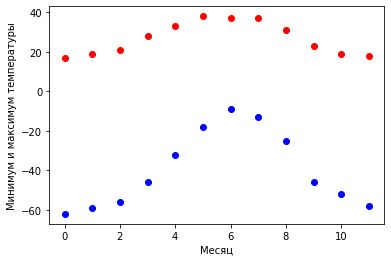

In [1]:
import numpy as np

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Месяц')
plt.ylabel('Минимум и максимум температуры')

Мы хотим найти и изобразить кривые, которые наилучшим образом «соответствуют» имеющимся данным.

In [2]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

Результат показан ниже.

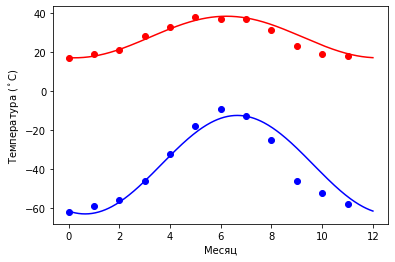

In [3]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Месяц')
plt.ylabel('Температура ($^\circ$C)')

plt.show()